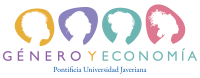

# **Sesión 3: Introducción a Matplotlib y visualizaciones en Python**

---

Autor: Andrés Felipe Díaz Rodríguez. Asistente de investigación Proyecto Género y Economía (https://generoyeconomia.org).

---


**Contenido de la sesión:**
*  ¿Qué es Matplotlib?
1. Ejemplos de gráficas básicas
2. Exportar una gráfica
3. Graficar datos a partir de un DataFrame
4. Personalización de gráficas

Nota: El material relacionado con esta sesión se encuentra en la página del curso: https://generoyeconomia.github.io/python_economia_cuidado/index.html  , en la sección Módulo 2.

## **¿Qué es Matplotlib?**

Matplotlib es una librería de Python que permite crear y exportar visualizaciones estáticas, animadas e interactivas.

## **Sintaxis básica**
```python
fig, ax = plt.subplots()             # Crea la gráfica y un objeto `ax`
    <Código de la gráfica>           # Acá va el código que define la vizualiación
plt.show()                           # Muestra la gráfica
```

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## **1. Ejemplos de gráficas básicas**

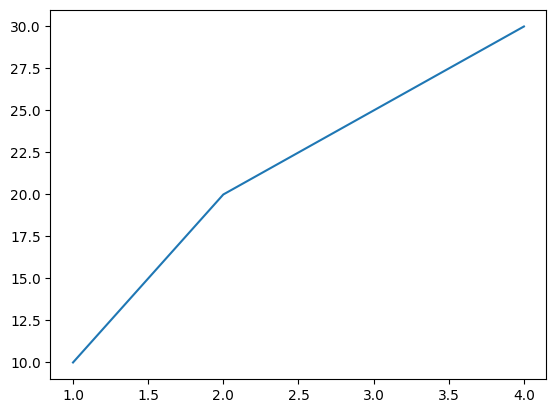

In [ ]:
# Datos
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

# Crea el objeto de Eje
fig, ax = plt.subplots()

# Crear la gráfica
ax.plot(x, y)

# Mostrar la gráfica
plt.show()

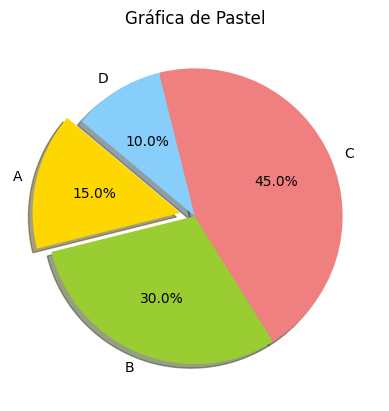

In [ ]:
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # 'Explota' el primer segmento

fig, ax = plt.subplots()

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_title('Gráfica de Pastel')

plt.show()

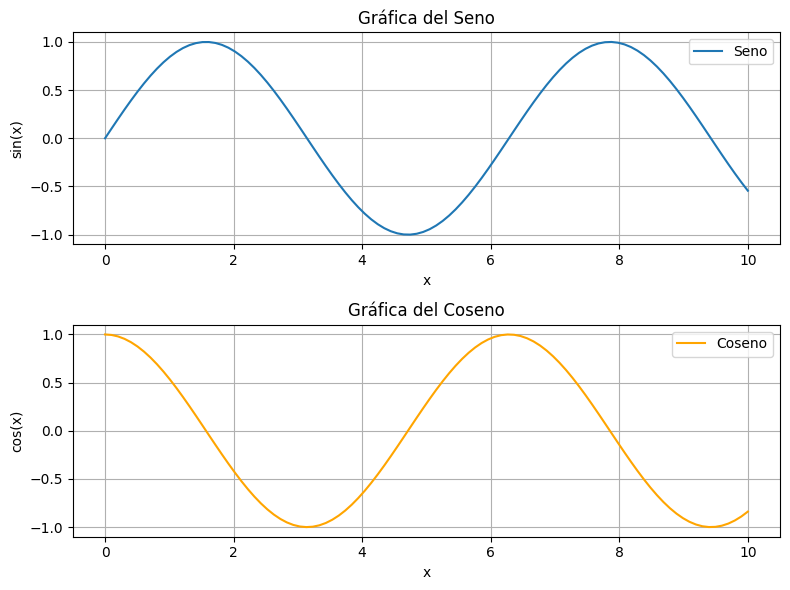

In [ ]:
# Datos para las gráficas
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Crear una figura y dos subgráficas (axes)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Primera subgráfica
ax1.plot(x, y1, label='Seno')
ax1.set_title('Gráfica del Seno')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')
ax1.legend()
ax1.grid(True)

# Segunda subgráfica
ax2.plot(x, y2, label='Coseno', color='orange')
ax2.set_title('Gráfica del Coseno')
ax2.set_xlabel('x')
ax2.set_ylabel('cos(x)')
ax2.legend()
ax2.grid(True)

# Ajustar el espacio entre las subgráficas
fig.tight_layout()

# Mostrar la figura
plt.show()

## **2. Exportar una gráfica**

De la misma manera que podemos exportar una gráfica como una imagen en cualquier formato que necesitemos (`.png`, `.jpeg`, `.pdf`, etc...)

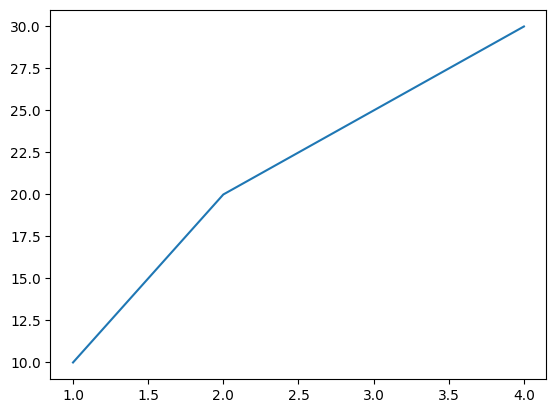

In [ ]:
# Datos
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

# Crea el objeto de Eje
fig, ax = plt.subplots()

# Crear la gráfica
ax.plot(x, y)

# Guardar la imagen en la ubicación especificada
plt.savefig('mi_grafica.png')
plt.savefig('mi_grafica.pdf')

# Mostrar la gráfica
plt.show()

## **3. Graficar datos a partir de un DataFrame**

A partir de un DataFrame de pandas podemos hacer todo tipo de visualizaciones. El primer paso es cargar la base de datos y para este ejercicio vamos a utlilizar la tabla del ejercicio final del cuaderno de pandas.

In [ ]:
horas_hogar_df = pd.read_csv("horas_hogar.csv")
horas_hogar_df

,Unnamed: 0,Familia,Persona,Género,Edad,Horas_Trabajo_Hogar,Mayor de 18
0,0,Familia1,1,Hombre,40,5,True
1,1,Familia1,2,Mujer,38,15,True
2,2,Familia1,3,Hombre,12,2,False
3,3,Familia2,1,Hombre,45,6,True
4,4,Familia2,2,Mujer,42,14,True
5,5,Familia3,1,Hombre,50,4,True
6,6,Familia3,2,Mujer,48,18,True
7,7,Familia3,3,Hombre,15,1,False
8,8,Familia3,4,Mujer,13,3,False
9,9,Familia4,1,Hombre,35,8,True


Un DataFrame tiene el módulo `.plot()` el cual, si no se especifica nada más, grafica líneas para todas las columnas numéricas del DataFrame.

Es necesario utilizar el argumento `ax` y darle como valor el objeto que creamos cuando definimos la gráfica.

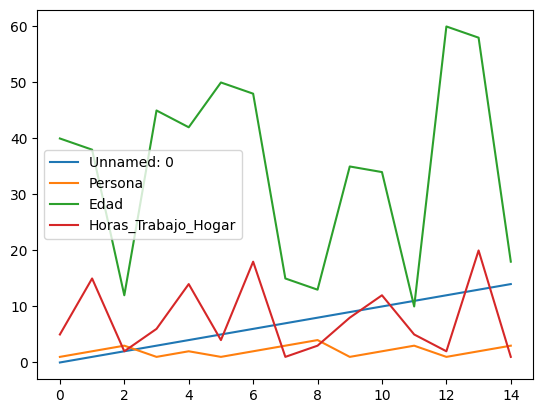

In [ ]:
fig, ax = plt.subplots()

horas_hogar_df.plot(ax=ax)

plt.show()

Se pueden hacer gráficas más específicas definiendo el tipo de gráfica y limitando qué columna queremos graficar. Por ejemplo, acá hacemos un histograma que muestra la distribución de la edad de las personas de la tabla.

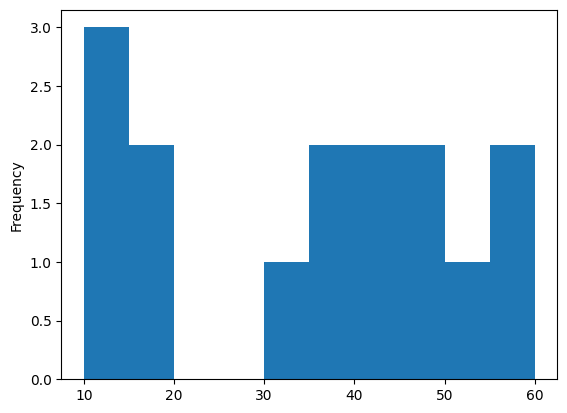

In [ ]:
fig, ax = plt.subplots()

horas_hogar_df["Edad"].plot(kind="hist",ax=ax)

plt.show()

Podemos combinar `.plot()` con `.gropuby()` para hacer gráficas de datos resumidos. La siguiente gráfica muestra el promedio de horas trabajadas en el hogar por familia.

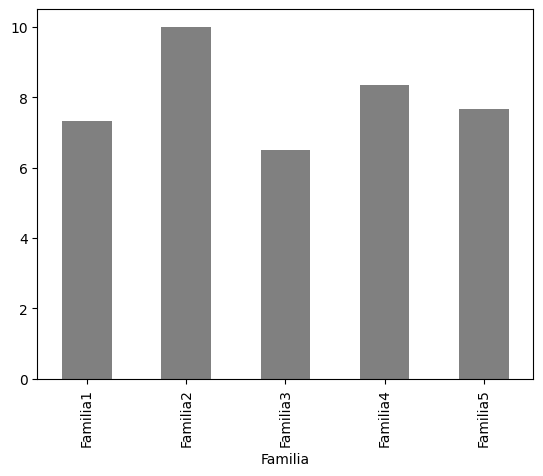

In [ ]:
fig, ax = plt.subplots()

horas_hogar_df.groupby("Familia")["Horas_Trabajo_Hogar"].agg("mean").plot(kind="bar",ax=ax,color="grey")

plt.show()

## **4. Personalización de gráficas**

Las gráficas que hemos visto hasta ahora han sido muy sencillas y utilizan solamente las funcionalidades predefinidas en los objetos de pandas. Sin embargo, es posible personalizar las gráficas para que se vean exactamente como queramos.

Podemos definir el título, los nombres, rótulos y etiquetas de los ejes, así como los colores, tamaño y estilo de todos los objetos que presentemos en las gráficas.

A continuación, vamos a hacer una gráfica de dispersión entre la edad y las horas de trabajo en el hogar de las personas de la tabla.

In [ ]:
# Definimos los datos que vamos a graficar. 'x' son los datos horizontales y 'y' son los verticales
x = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Edad"]
y = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Horas_Trabajo_Hogar"]

In [ ]:
x

In [ ]:
y

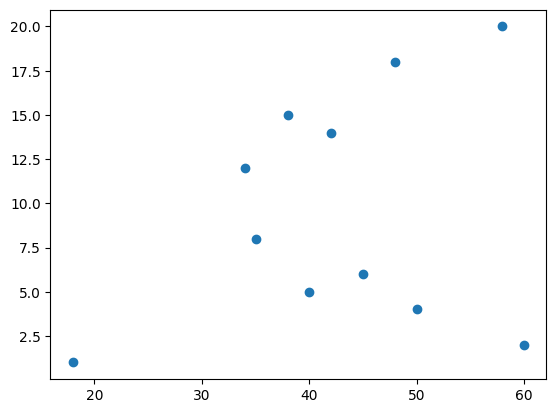

In [ ]:
# Creamos la gráfica
fig, ax = plt.subplots()

# Creamos el gráfico de dispersión
ax.scatter(x,y)

# Mostramos la gráfica
plt.show()

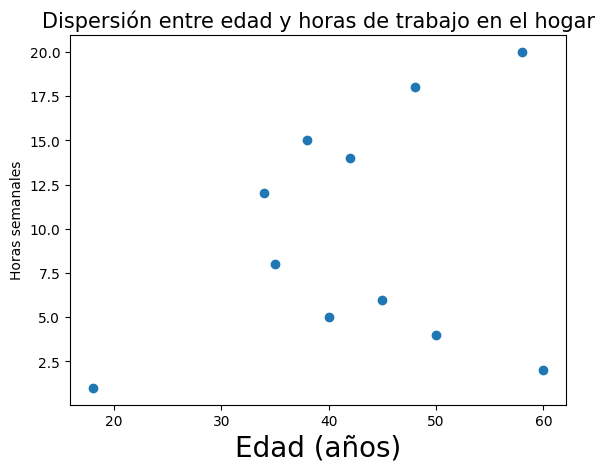

In [ ]:
# Definimos los datos que vamos a graficar. 'x' son los datos horizontales y 'y' son los verticales
x = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Edad"]
y = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Horas_Trabajo_Hogar"]

# Creamos la gráfica
fig, ax = plt.subplots()

# Creamos el gráfico de dispersión
ax.scatter(x,y)

# Definimos el título de la gráfica
ax.set_title("Dispersión entre edad y horas de trabajo en el hogar",size=15)

# Definimos el nombre de los ejes
ax.set_xlabel("Edad (años)",size=20)
ax.set_ylabel("Horas semanales",size=10)

# Mostramos la gráfica
plt.show()

### **Colores**

El manejo de colores es esencial para mostrar gráficas efectivas y visualmente atractivas. Muchos de los colores que podemos usar tienen nombres en Matplotlib y podemos encontrarlos [documentación oficial](https://matplotlib.org/stable/gallery/color/named_colors.html).

Si quisieramos diferenciar a las personas que tienen más de 18 años de las que tienen menos de 18 en el gráfico anterior, podríamos hacerlo de la siguiente manera.

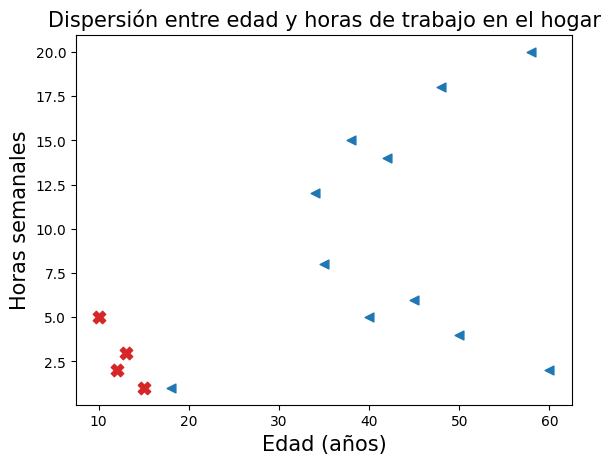

In [ ]:
# Definimos los datos que vamos a graficar para las personas mayores de 18 años
x1 = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Edad"]
y1 = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Horas_Trabajo_Hogar"]
colores1 = horas_hogar_df.loc[horas_hogar_df["Edad"]>=18,"Color"].to_list()

# Y para las peronas menores de 18 años
x2 = horas_hogar_df.loc[horas_hogar_df["Edad"]<18,"Edad"]
y2 = horas_hogar_df.loc[horas_hogar_df["Edad"]<18,"Horas_Trabajo_Hogar"]
colores2 = horas_hogar_df.loc[horas_hogar_df["Edad"]<18,"Color"].to_list()

# Creamos la gráfica
fig, ax = plt.subplots()

# Graficamos los puntos de los mayores de 18
ax.scatter(x1,y1,c="tab:blue",marker="<",s=40)

# Graficamos los puntos de los menores de 18
ax.scatter(x2,y2,c="tab:red",marker="X",s=80)

# Definimos el título de la gráfica
ax.set_title("Dispersión entre edad y horas de trabajo en el hogar",size=15)

# Definimos el nombre de los ejes
ax.set_xlabel("Edad (años)",size=15)
ax.set_ylabel("Horas semanales",size=15)

# Mostramos la gráfica
plt.show()

Ahora vamos a hacer que los puntos se diferencien en color y forma, según el género de cada persona.

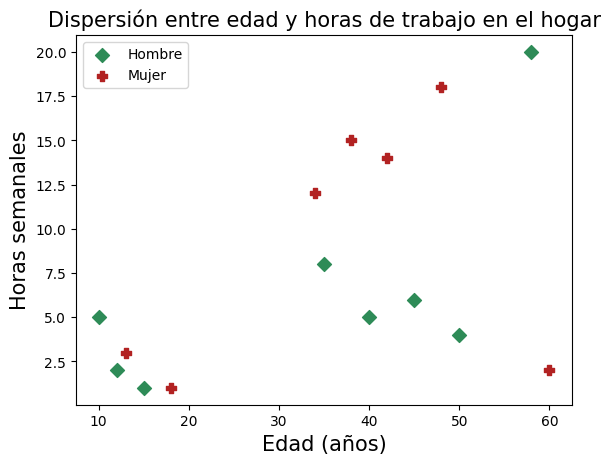

In [ ]:
fig, ax = plt.subplots()

for g in horas_hogar_df["Género"].unique() :
    indicador = horas_hogar_df["Género"] == g

    x = horas_hogar_df.loc[indicador,"Edad"]
    y = horas_hogar_df.loc[indicador,"Horas_Trabajo_Hogar"]

    if g == "Hombre" :
        color = "seagreen"
        forma = "D"
    elif g == "Mujer" :
        color = "firebrick"
        forma = "P"

    ax.scatter(x,y,c=color,marker=forma,s=50,label=g)


ax.legend()

ax.set_title("Dispersión entre edad y horas de trabajo en el hogar",size=15)

ax.set_xlabel("Edad (años)",size=15)
ax.set_ylabel("Horas semanales",size=15)

plt.show()

**Ejercicio:** Agreguen a la gráfica anterior una línea horizontal que marque el promedio de las horas trabajadas semanalmente por hombres y por mujeres.
* Calculen los valores y guardarlos en algún objeto
* Busquen cómo se dibujan líneas en Matplotlib
* Personalizen las líneas para que visualmente se vean asociadas a los puntos
